First, please upload the dataset from your machine by running this section and click on "Browse", make sure it is called "MP2_Data.csv"

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file from your computer
uploaded = files.upload()

# Assuming the file you will upload is called "MP2_Data.csv"
file_name = list(uploaded.keys())[0]  # Automatically grabs the first uploaded file's name

# Load the dataset into a DataFrame
data = pd.read_csv(file_name)
# Display the first few rows of the dataset to understand its structure
print("First few rows of the data:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()

print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Only display columns with missing values


Saving MP2_Data.csv to MP2_Data (8).csv
First few rows of the data:
          ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0  ML-2020-1         5.00       15.0        5.0      16.09       5.00   
1  ML-2020-2         3.33       15.0        5.0      17.83       5.00   
2  ML-2020-3         1.67       13.0        5.0      15.22       5.00   
3  ML-2020-4         2.50       14.0        5.0      10.00       5.00   
4  ML-2020-6         0.00       15.0        5.0      12.17       4.93   

   Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  ...  Week7_Stat3  \
0      21.88        5.0         5.00          5.0  ...            0   
1      22.27        5.0         4.00          5.0  ...            8   
2      27.05        2.5         5.00          5.0  ...            0   
3      31.02        5.0         3.13          5.0  ...            4   
4      15.91        5.0         4.67          5.0  ...            6   

   Week8_Stat0  Week8_Stat1  Week8_Stat2  Week8_Stat3  Week9_Stat0

In [ ]:
# List all columns (features) in the dataset
print("List of features in the dataset:")
print(data.columns)

# Get a summary of the dataset (data types, non-null counts, etc.)
print("\nSummary of the dataset:")
print(data.info())

# Show descriptive statistics of the dataset
print("\nDescriptive statistics of numerical features:")
print(data.describe())

# Look at a few random rows to understand the data better
print("\nRandom sample of the data to see the values:")
print(data.sample(5))


List of features in the dataset:
Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
--

We removed here the 'ID' column as it is irrelevant to data prediction, and Week8_Total as it is directly represents the final Grade which makes the purpose of Machine Learning prediction meaningless

In [ ]:
# Removing 'Student_ID' and 'Week8_Total' columns from the dataset
data_cleaned = data.drop(columns=['ID','Week8_Total'], errors='ignore')
#cleaned data for another use in random forests
data_cleaned2 = data.drop(columns=['ID','Week8_Total'], errors='ignore')
# Checking the remaining features after removing the columns
print("Features after removing 'ID', and 'Week8_Total':")
print(data_cleaned.columns)

# Displaying the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(data_cleaned.head())


Features after removing 'ID', and 'Week8_Total':
Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0',
       'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0',
       'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0',
       'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0',
       'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0',
       'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0',
       'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0',
       'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0',
       'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0',
       'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

First few rows of the cleaned dataset:
   Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  Week7_MP3  \
0         5.00       15.0        5.0      16.09       5.00      21

Here, we remove cloumns with low-variance (all data are the same).
Then, we draw the heatmap to show correlations between features and eachother. Based on this, we can identify highly correlated columns and consider removing one of them

Columns with low variance (all values are the same):
['Week1_Stat1']


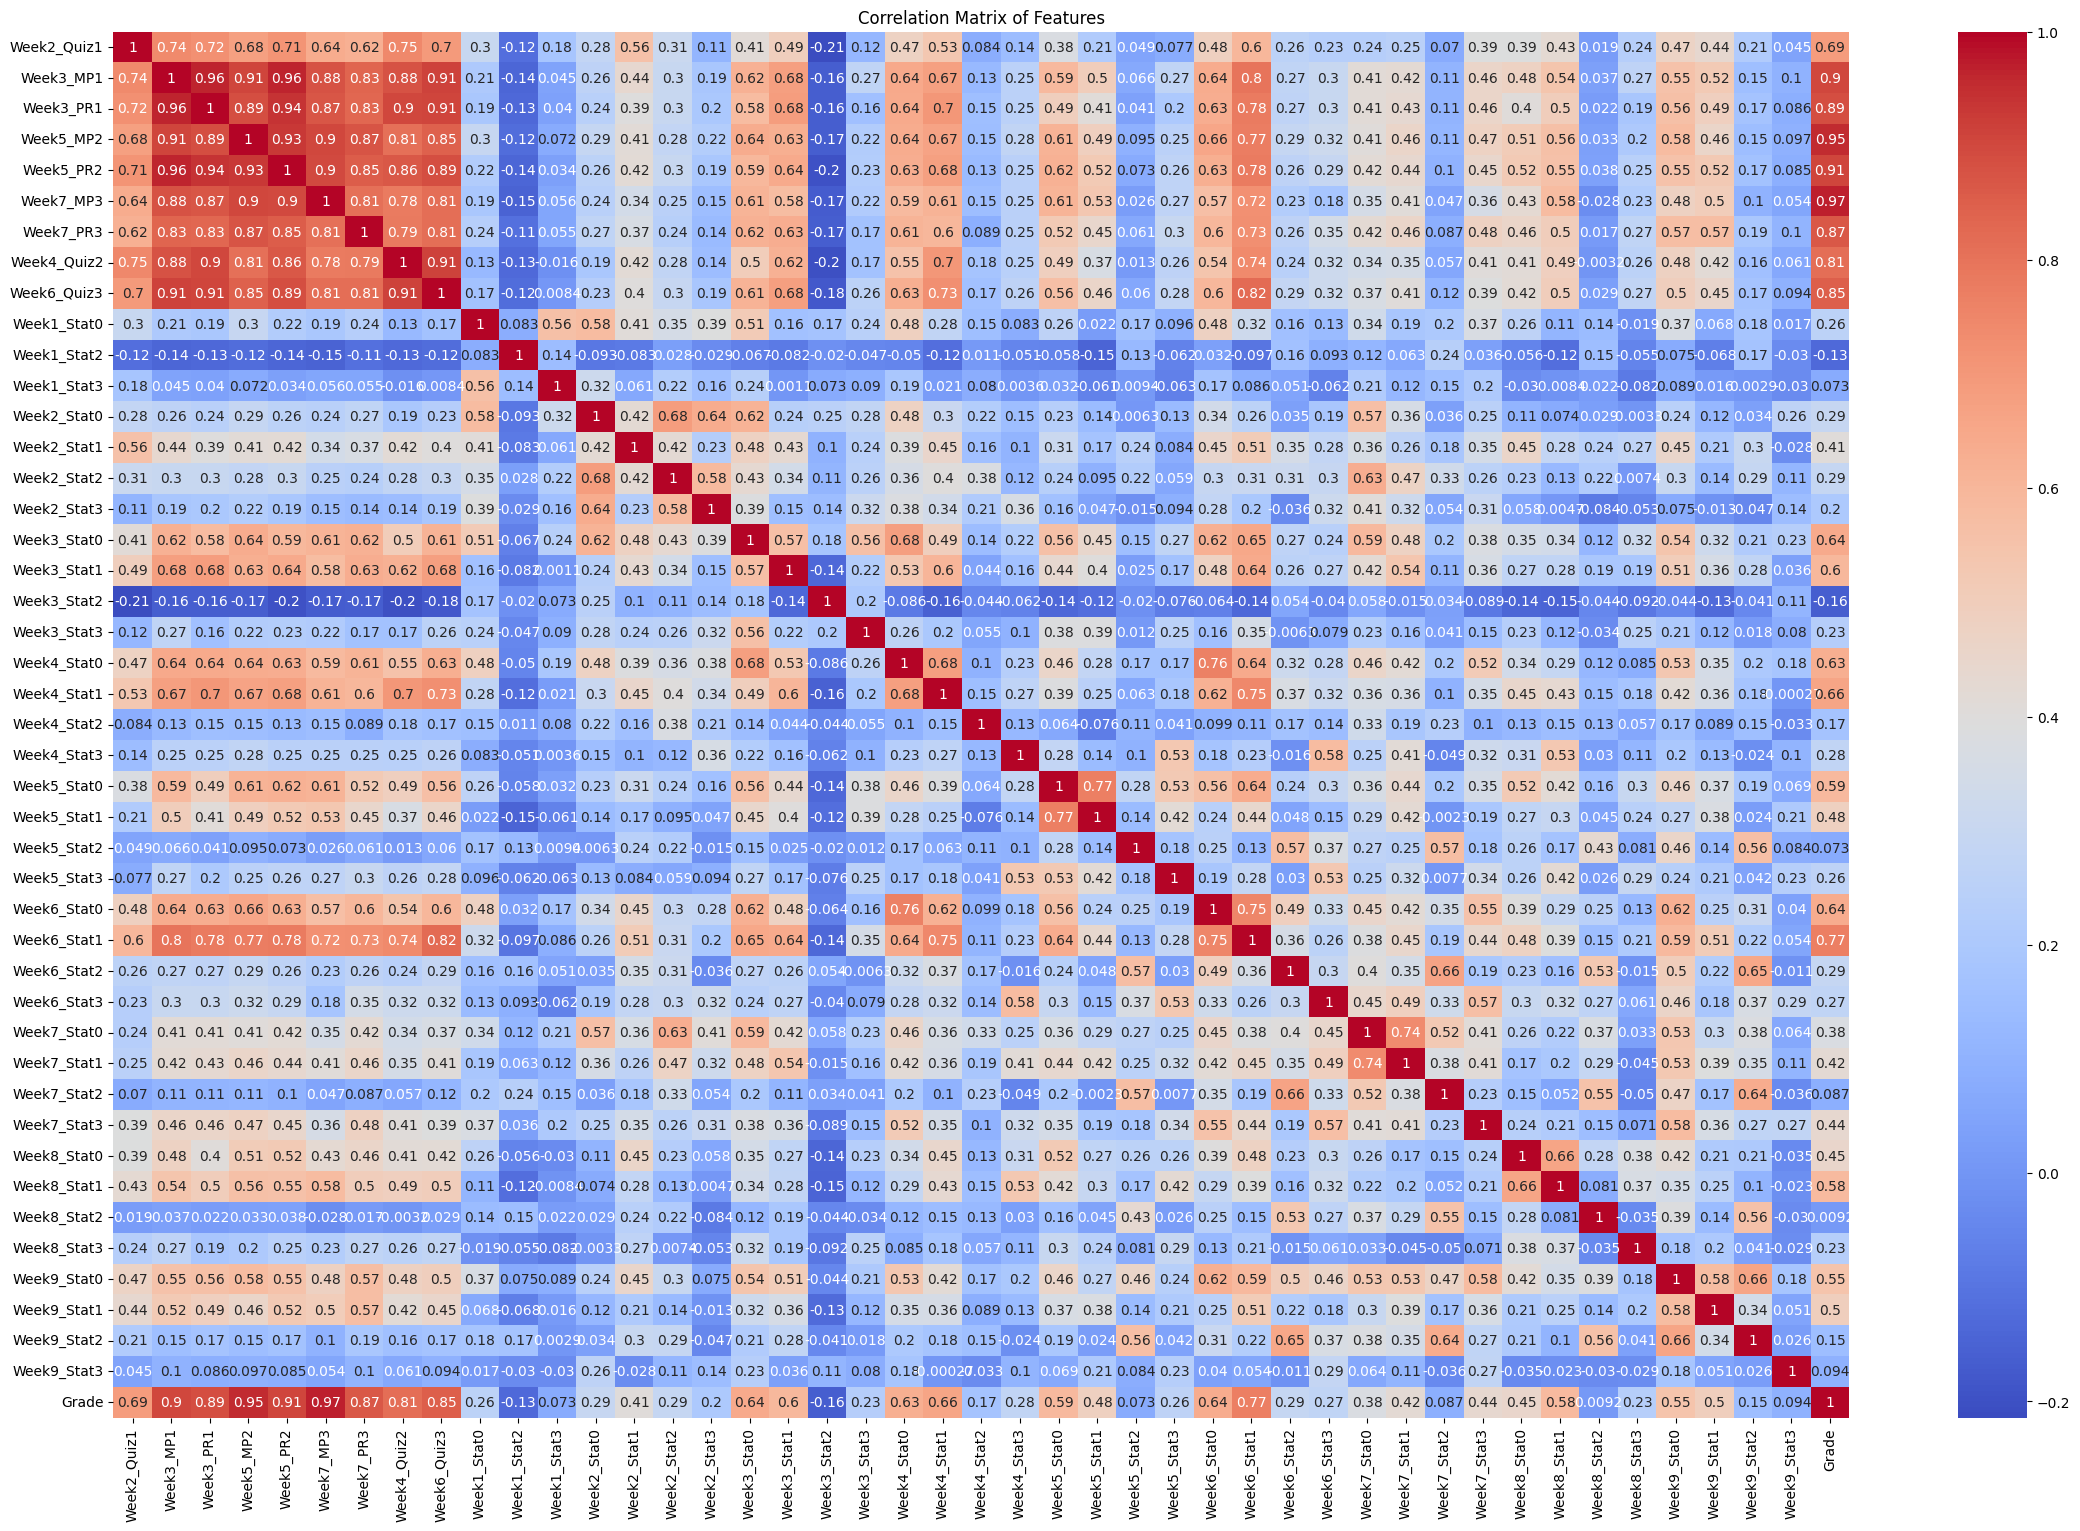

In [ ]:
# Check for columns with low variance
low_variance_features = data_cleaned.var()[data_cleaned.var() == 0].index.tolist()

print("Columns with low variance (all values are the same):")
print(low_variance_features)

# Remove low variance features from the dataset
data_cleaned = data_cleaned.drop(columns=low_variance_features)

# Check for correlation between features
correlation_matrix = data_cleaned.corr()

# Display the correlation matrix to identify highly correlated features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Here we calculate and print the correlation between each feature and the target.

In [ ]:
target_column = 'Grade'

# Calculate the correlation between all features and the target (Final_Grade)
correlation_with_target = data_cleaned.corr()[target_column].sort_values(ascending=False)

# Display the correlation between each feature and the target
print(f"Correlation between features and the target ({target_column}):")
print(correlation_with_target)

#Features with significant correlation (absolute value > 0.2 for example)
# significant_correlations = correlation_with_target[abs(correlation_with_target) > 0.2]
# print("\nFeatures with significant correlation with the target (|correlation| > 0.2):")
# print(significant_correlations)


Correlation between features and the target (Grade):
Grade          1.000000
Week7_MP3      0.968130
Week5_MP2      0.953488
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Week7_Stat0    0.377195
Week2_Stat0    0.293296
Week2_Stat2    0.292262
Week6_Stat2    0.288761
Week4_Stat3    0.278034
Week6_Stat3    0.270239
Week5_Stat3    0.264079
Week1_Stat0    0.256311
Week8_Stat3    0.234907
Week3_Stat3    0.227106
Week2_Stat3    0.202950
Week4_Stat2    0.171987
Week9_Stat2    0.147822
Week9_Stat3    0.094227
Week7_Stat2

Here we check correlation between features and eachother, if 2 features in a pair has >= 0.95 correlation, we filter out one of them, the one which is less correlated to the target.

In [ ]:
# Define the target column (e.g., the final grade)
target_column = 'Grade'  # Replace with your actual target column name

# Set a high correlation threshold (e.g., 0.95)
high_correlation_threshold = 0.95

# Calculate the correlation matrix for the numeric features
correlation_matrix = data_cleaned.corr()

# Initialize a set to track features to drop
to_drop = set()

# Initialize a list to store highly correlated pairs
high_correlation_pairs = []

# Check for highly correlated feature pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        feature_1 = correlation_matrix.columns[i]
        feature_2 = correlation_matrix.columns[j]

        # Skip the comparison if either feature is the target (Grade)
        if feature_1 == target_column or feature_2 == target_column:
            continue  # Skip the pair if it involves the target column

        # Check if the correlation is above the threshold
        if abs(correlation_matrix.iloc[i, j]) >= high_correlation_threshold:

            # If either feature is already marked for removal, skip this pair
            if feature_1 in to_drop or feature_2 in to_drop:
                continue  # Skip this pair if either feature has been dropped already

            # Print the highly correlated pair
            print(f"Highly correlated pair: {feature_1} and {feature_2} - Correlation: {correlation_matrix.iloc[i, j]:.2f}")

            # Store the pair for reference (optional)
            high_correlation_pairs.append((feature_1, feature_2, correlation_matrix.iloc[i, j]))

            # Compare correlation of both features with the target (Final_Grade)
            corr_with_target_1 = abs(correlation_matrix[target_column][feature_1])
            corr_with_target_2 = abs(correlation_matrix[target_column][feature_2])

            # Drop the feature with the lower correlation with the target
            if corr_with_target_1 > corr_with_target_2:
                to_drop.add(feature_2)
            else:
                to_drop.add(feature_1)

# Drop the selected features
data_cleaned = data_cleaned.drop(columns=to_drop)

# Print removed columns and remaining columns
print(f"\nColumns removed due to high correlation: {to_drop}")
print("\nRemaining columns after removal:")
print(data_cleaned.columns)


Highly correlated pair: Week3_PR1 and Week3_MP1 - Correlation: 0.96
Highly correlated pair: Week5_PR2 and Week3_MP1 - Correlation: 0.96

Columns removed due to high correlation: {'Week3_PR1', 'Week3_MP1'}

Remaining columns after removal:
Index(['Week2_Quiz1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3',
       'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat2',
       'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2',
       'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2',
       'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2',
       'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2',
       'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2',
       'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2',
       'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2',
       'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2',
       'Week9_Stat3', 'Grade'],
      dtype='object')


Heat map of the remained features

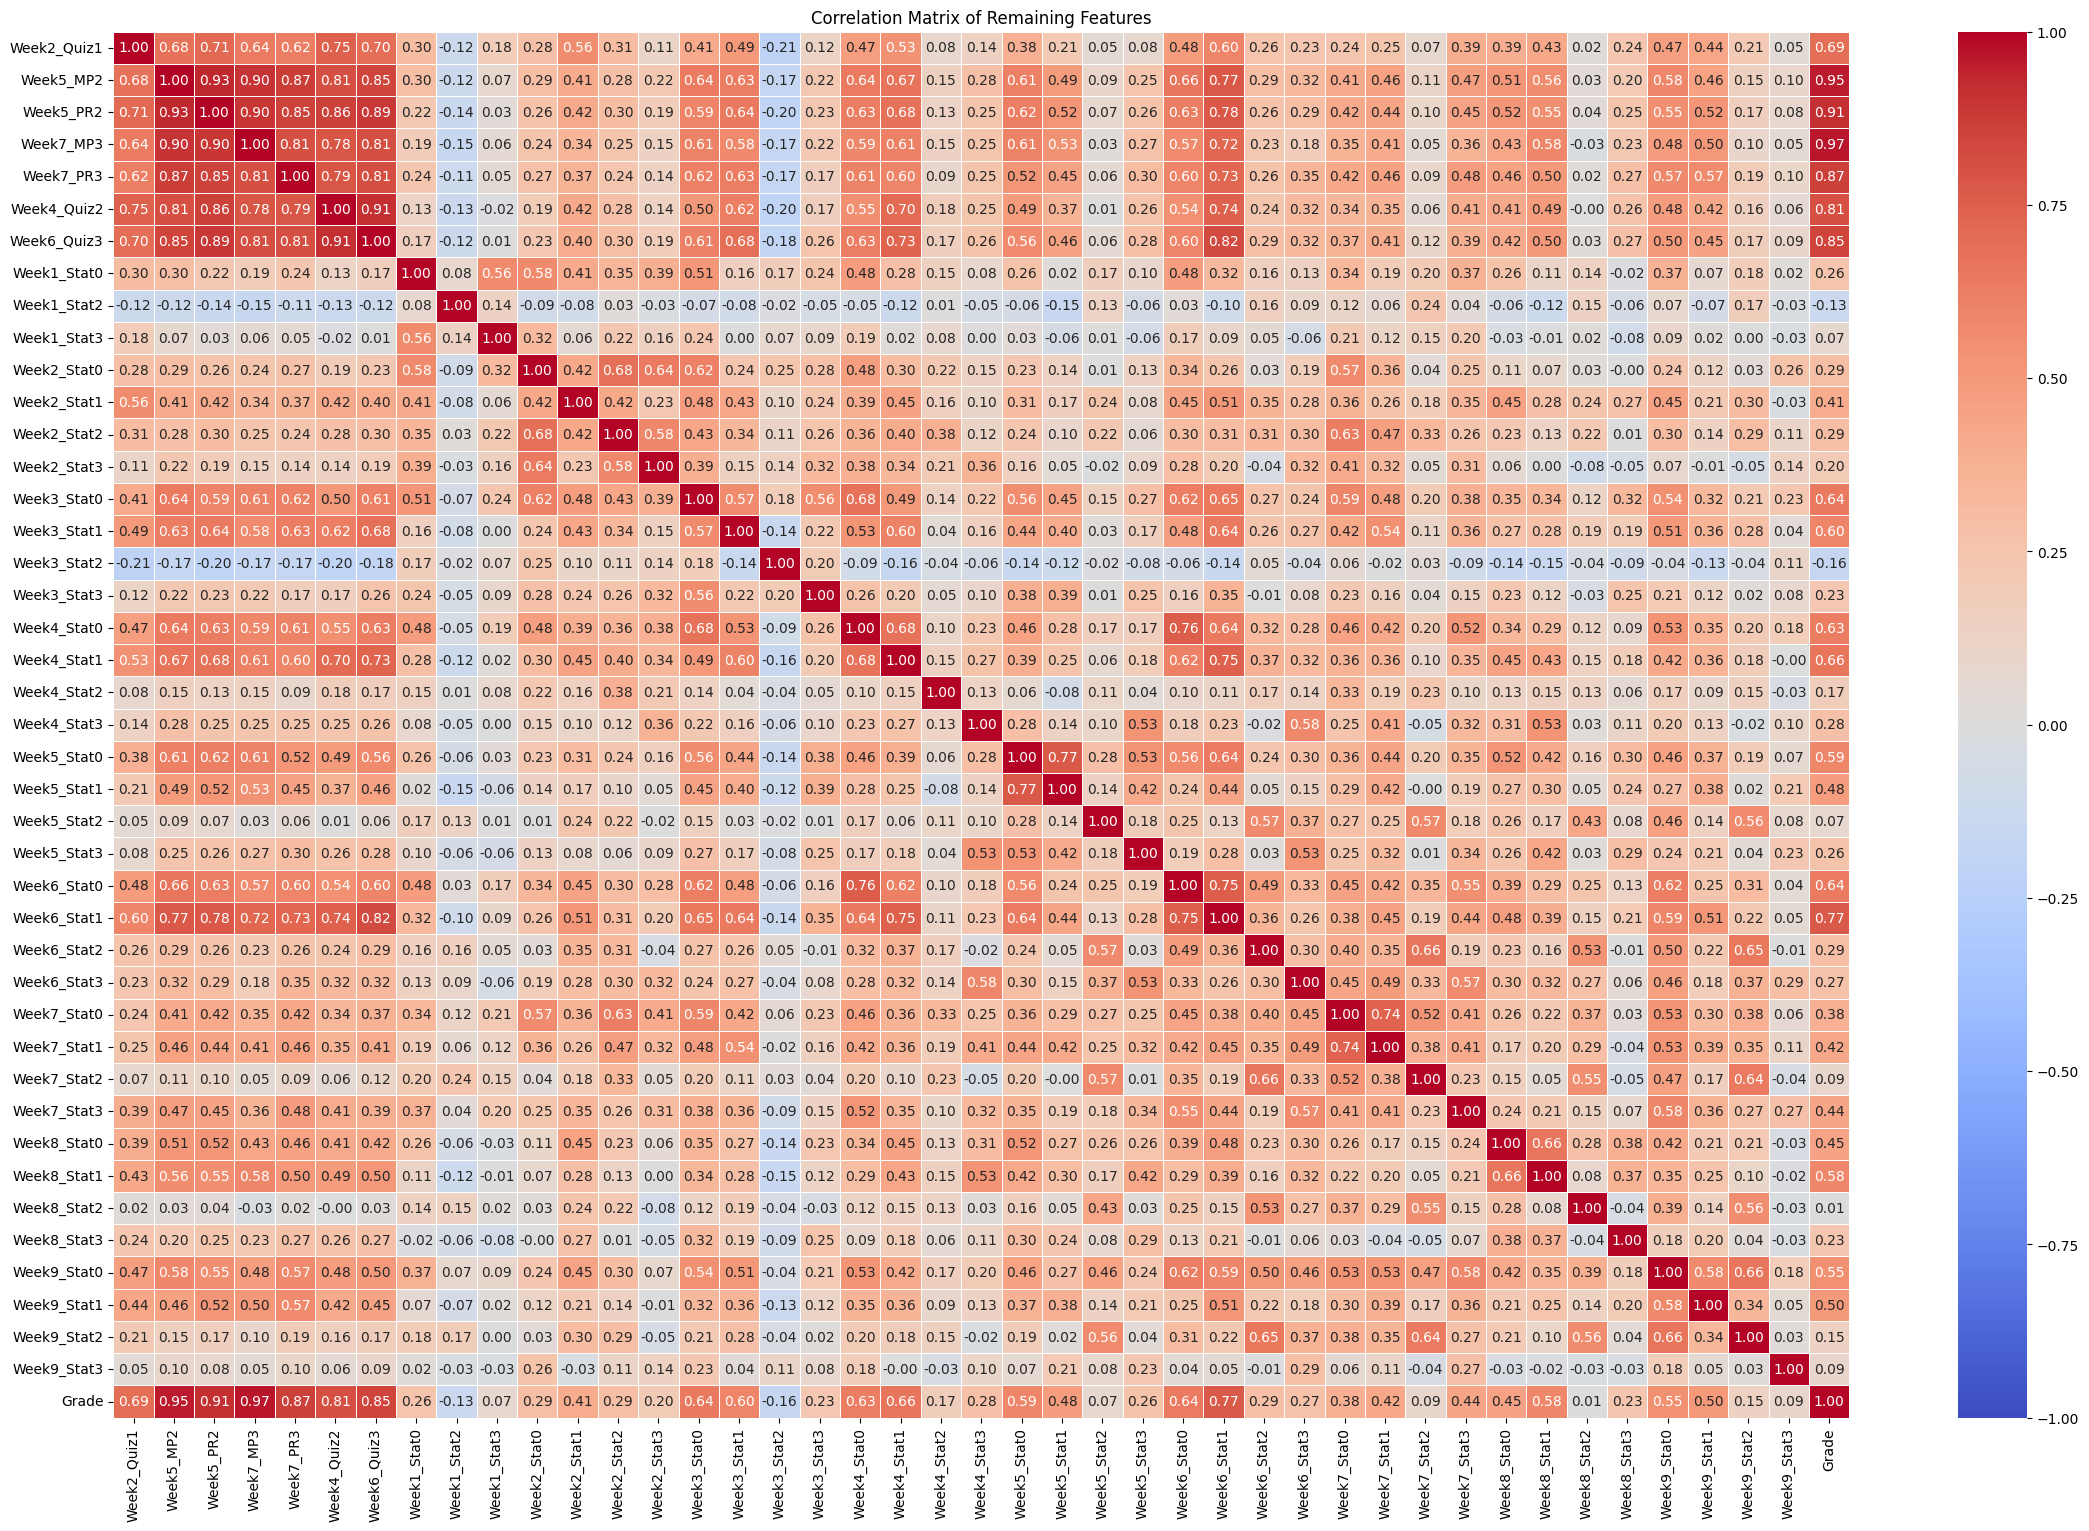

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the updated correlation matrix for the cleaned dataset
correlation_matrix_cleaned = data_cleaned.corr()

# Setting the figure size for better visibility
plt.figure(figsize=(28, 18))

#Heatmap
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Remaining Features')
plt.show()


Filter features which have correlation with the target less than 0.5 or bigger than 0.95

In [ ]:
# Define the target column (replace 'Final_Grade' with your actual target column name)
target_column = 'Grade'

# Define correlation thresholds
lower_threshold = 0.5
upper_threshold = 0.95

# Calculate the correlation of each feature with the target (absolute correlation)
correlation_with_target = data_cleaned.corr()[target_column].abs()

# Display correlations to check
print("Correlation of features with the target (Final_Grade):")
print(correlation_with_target)

# Identify features with correlation less than the lower threshold or greater than the upper threshold
low_correlation_features = correlation_with_target[(correlation_with_target < lower_threshold) | (correlation_with_target > upper_threshold)].index.tolist()

# Remove the target column itself from the list (if it's included)
if target_column in low_correlation_features:
    low_correlation_features.remove(target_column)

# Drop the identified low-correlation features
data_cleaned = data_cleaned.drop(columns=low_correlation_features)

# Display the remaining columns after removal
print(f"\nColumns removed due to correlation with the target < {lower_threshold} or > {upper_threshold}: {low_correlation_features}")
print("\nRemaining columns after removal:")
print(data_cleaned.columns)


Correlation of features with the target (Final_Grade):
Week2_Quiz1    0.689783
Week5_MP2      0.953488
Week5_PR2      0.907837
Week7_MP3      0.968130
Week7_PR3      0.865616
Week4_Quiz2    0.810920
Week6_Quiz3    0.849920
Week1_Stat0    0.256311
Week1_Stat2    0.129440
Week1_Stat3    0.072546
Week2_Stat0    0.293296
Week2_Stat1    0.406120
Week2_Stat2    0.292262
Week2_Stat3    0.202950
Week3_Stat0    0.643789
Week3_Stat1    0.596824
Week3_Stat2    0.162950
Week3_Stat3    0.227106
Week4_Stat0    0.625359
Week4_Stat1    0.662946
Week4_Stat2    0.171987
Week4_Stat3    0.278034
Week5_Stat0    0.590146
Week5_Stat1    0.484030
Week5_Stat2    0.073326
Week5_Stat3    0.264079
Week6_Stat0    0.635807
Week6_Stat1    0.771988
Week6_Stat2    0.288761
Week6_Stat3    0.270239
Week7_Stat0    0.377195
Week7_Stat1    0.424807
Week7_Stat2    0.087466
Week7_Stat3    0.439733
Week8_Stat0    0.450807
Week8_Stat1    0.584425
Week8_Stat2    0.009186
Week8_Stat3    0.234907
Week9_Stat0    0.545532
Week9_Sta

Heat map of features which will go through machine learning models

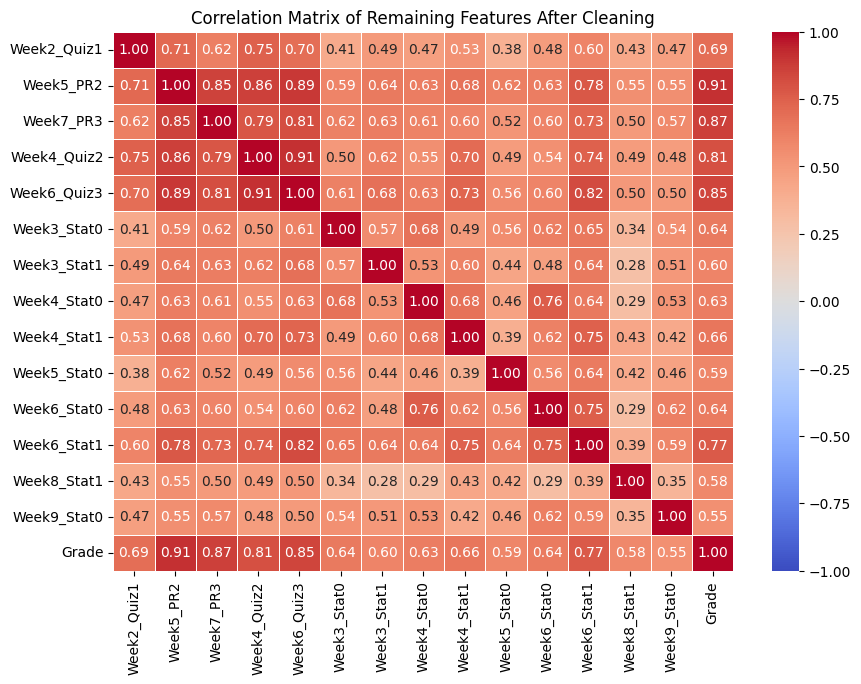

In [ ]:
# Calculate the updated correlation matrix for the cleaned dataset
correlation_matrix_cleaned = data_cleaned.corr()

# Set the figure size for better visibility
plt.figure(figsize=(10, 7))

# Draw the heatmap
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix of Remaining Features After Cleaning')
plt.show()

Splitting traning and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_column = 'Grade'  # Replace with the actual target column name
X = data_cleaned.drop(columns=[target_column])  # Features (all columns except the target)
y = data_cleaned[target_column]  # Target (final grade)

# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (80, 14), y_train: (80,)
Testing set shape: X_test: (27, 14), y_test: (27,)


**Linear Regression**

Linear Regression MSE: 0.74
Linear Regression R²: 0.81
Linear Regression MAE: 0.56
Linear Regression R² Score: 0.81

Comparison of Predicted vs Actual Values:
Actual: 0.00, Predicted: -0.17
Actual: 5.00, Predicted: 4.18
Actual: 0.00, Predicted: 0.39
Actual: 3.00, Predicted: 3.17
Actual: 4.00, Predicted: 5.07
Actual: 4.00, Predicted: 4.24
Actual: 3.00, Predicted: 2.87
Actual: 0.00, Predicted: 3.22
Actual: 4.00, Predicted: 4.38
Actual: 5.00, Predicted: 3.92
Actual: 0.00, Predicted: -0.22
Actual: 0.00, Predicted: -0.19
Actual: 0.00, Predicted: -0.06
Actual: 4.00, Predicted: 3.01
Actual: 4.00, Predicted: 3.82
Actual: 3.00, Predicted: 3.40
Actual: 3.00, Predicted: 3.58
Actual: 3.00, Predicted: 4.21
Actual: 0.00, Predicted: -0.17
Actual: 4.00, Predicted: 3.73
Actual: 0.00, Predicted: -0.09
Actual: 0.00, Predicted: 0.60
Actual: 5.00, Predicted: 3.63
Actual: 0.00, Predicted: -0.14
Actual: 0.00, Predicted: 0.11
Actual: 0.00, Predicted: -0.16
Actual: 3.00, Predicted: 3.80


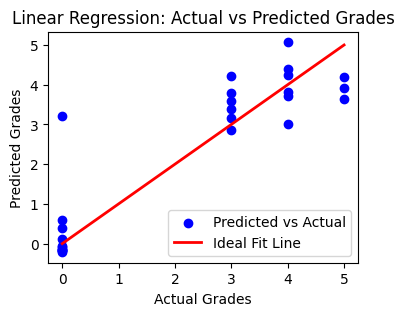

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model performance
mse_lin_1 = mean_squared_error(y_test, y_pred_lin)
r2_lin_1 = r2_score(y_test, y_pred_lin)
mae_lin_1 = mean_absolute_error(y_test, y_pred_lin)  # Added MAE calculation

print(f"Linear Regression MSE: {mse_lin_1:.2f}")
print(f"Linear Regression R²: {r2_lin_1:.2f}")
print(f"Linear Regression MAE: {mae_lin_1:.2f}")  # Print MAE value

# For Linear Regression R²
linear_score = lin_reg.score(X_test, y_test)
print(f"Linear Regression R² Score: {linear_score:.2f}")

# Print the comparison between predicted and actual values
print("\nComparison of Predicted vs Actual Values:")
for actual, predicted in zip(y_test, y_pred_lin):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit Line')  # Line of perfect fit

# Add labels and title
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Linear Regression: Actual vs Predicted Grades')
plt.legend()

# Show the plot
plt.show()



**Linear Regression with rounding the predicted values (works similar to a classifier)**

Linear Regression MSE (Rounded): 0.67
Linear Regression R² (Rounded): 0.83
Linear Regression MAE (Rounded): 0.44

Comparison of Predicted vs Actual Values (Rounded):
Actual: 0.00, Predicted: 0.00
Actual: 5.00, Predicted: 4.00
Actual: 0.00, Predicted: 0.00
Actual: 3.00, Predicted: 3.00
Actual: 4.00, Predicted: 5.00
Actual: 4.00, Predicted: 4.00
Actual: 3.00, Predicted: 3.00
Actual: 0.00, Predicted: 3.00
Actual: 4.00, Predicted: 4.00
Actual: 5.00, Predicted: 4.00
Actual: 0.00, Predicted: 0.00
Actual: 0.00, Predicted: 0.00
Actual: 0.00, Predicted: 0.00
Actual: 4.00, Predicted: 3.00
Actual: 4.00, Predicted: 4.00
Actual: 3.00, Predicted: 3.00
Actual: 3.00, Predicted: 4.00
Actual: 3.00, Predicted: 4.00
Actual: 0.00, Predicted: 0.00
Actual: 4.00, Predicted: 4.00
Actual: 0.00, Predicted: 0.00
Actual: 0.00, Predicted: 1.00
Actual: 5.00, Predicted: 4.00
Actual: 0.00, Predicted: 0.00
Actual: 0.00, Predicted: 0.00
Actual: 0.00, Predicted: 0.00
Actual: 3.00, Predicted: 4.00


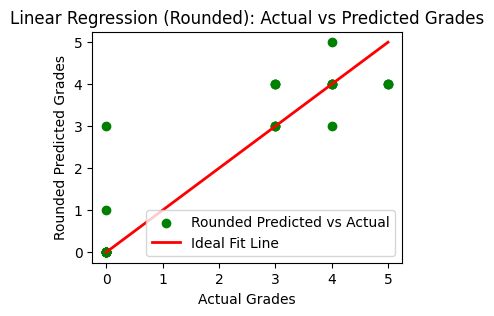

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Round the predicted values mathematically
rounded_predictions = [round(score) for score in y_pred_lin]

# Evaluate the model performance based on rounded predictions
mse_lin_2 = mean_squared_error(y_test, rounded_predictions)
r2_lin_2 = r2_score(y_test, rounded_predictions)
mae_lin_2 = mean_absolute_error(y_test, rounded_predictions)  # Added MAE calculation

print(f"Linear Regression MSE (Rounded): {mse_lin_2:.2f}")
print(f"Linear Regression R² (Rounded): {r2_lin_2:.2f}")
print(f"Linear Regression MAE (Rounded): {mae_lin_2:.2f}")  # Print MAE value

# Print the comparison between actual and rounded predicted values
print("\nComparison of Predicted vs Actual Values (Rounded):")
for actual, predicted in zip(y_test, rounded_predictions):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


import matplotlib.pyplot as plt

# Plot actual vs rounded predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, rounded_predictions, color='green', label='Rounded Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit Line')  # Ideal line of perfect fit

# Add labels and title
plt.xlabel('Actual Grades')
plt.ylabel('Rounded Predicted Grades')
plt.title('Linear Regression (Rounded): Actual vs Predicted Grades')
plt.legend()

# Show the plot
plt.show()



**Random Forsest Regressor with filterd data**

Random Forest Regression MSE: 0.65
Random Forest Regression R²: 0.83
Random Forest Regression MAE: 0.43


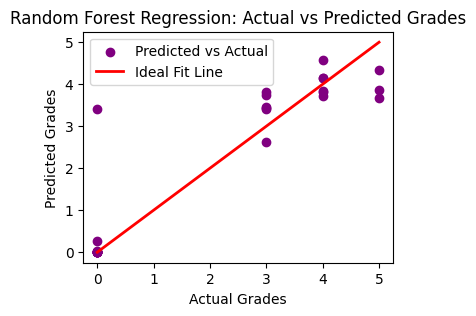

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
rf_reg = RandomForestRegressor(random_state=2)

# Train the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model performance
mse_rf_1 = mean_squared_error(y_test, y_pred_rf)
r2_rf_1 = r2_score(y_test, y_pred_rf)
mae_rf_1 = mean_absolute_error(y_test, y_pred_rf)  # Added MAE calculation

print(f"Random Forest Regression MSE: {mse_rf_1:.2f}")
print(f"Random Forest Regression R²: {r2_rf_1:.2f}")
print(f"Random Forest Regression MAE: {mae_rf_1:.2f}")  # Print MAE value


import matplotlib.pyplot as plt

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit Line')  # Ideal line of perfect fit

# Add labels and title
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Random Forest Regression: Actual vs Predicted Grades')
plt.legend()

# Show the plot
plt.show()


**Random Forest on unfiltered data**

Random Forest Regression MSE: 0.17
Random Forest Regression R²: 0.95
Random Forest Regression MAE: 0.26


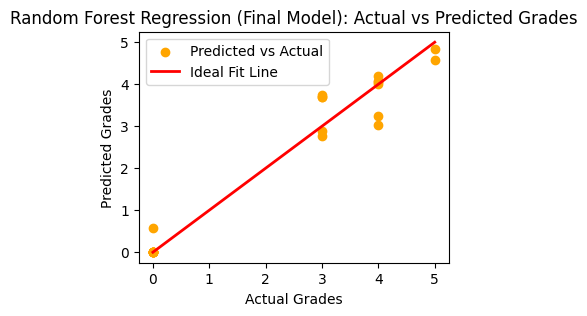

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'Grade' is the target column and all others are features
target_column = 'Grade'
X = data_cleaned2.drop(columns=[target_column])  # Features (all columns except the target)
y = data_cleaned2[target_column]  # Target (final grade)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=2)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
mse_rf_2 = mean_squared_error(y_test, y_pred_rf)
r2_rf_2 = r2_score(y_test, y_pred_rf)
mae_rf_2 = mean_absolute_error(y_test, y_pred_rf)  # Added MAE calculation

# Print the results
print(f"Random Forest Regression MSE: {mse_rf_2:.2f}")
print(f"Random Forest Regression R²: {r2_rf_2:.2f}")
print(f"Random Forest Regression MAE: {mae_rf_2:.2f}")  # Print MAE value

import matplotlib.pyplot as plt

# Plot actual vs predicted values for the final Random Forest model
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred_rf, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit Line')  # Ideal line of perfect fit

# Add labels and title
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Random Forest Regression (Final Model): Actual vs Predicted Grades')
plt.legend()

# Show the plot
plt.show()



0.8102305539186971 0.8280254777070064 0.8319722929936306 0.9546990560799555
0.7356494576485072 0.6666666666666666 0.6513666666666666 0.16856818181818178
0.5629420580412924 0.4444444444444444 0.42925925925925923 0.2586363636363636


<ipython-input-193-bf8618de9968>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_r2 = sns.barplot(x=model_names, y=r2_scores, palette='viridis')


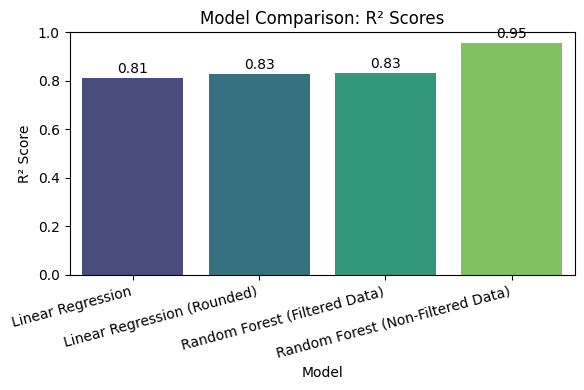

<ipython-input-193-bf8618de9968>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_mse = sns.barplot(x=model_names, y=mse_scores, palette='magma')


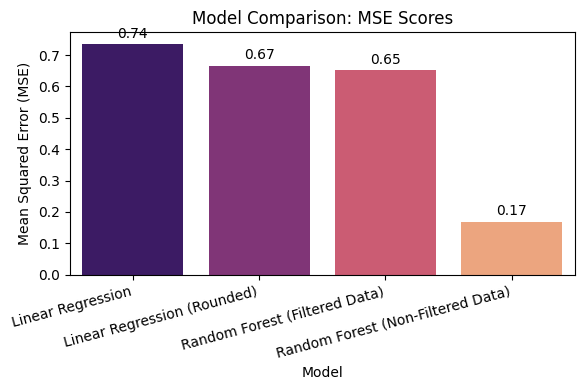

<ipython-input-193-bf8618de9968>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_mae = sns.barplot(x=model_names, y=mae_scores, palette='coolwarm')


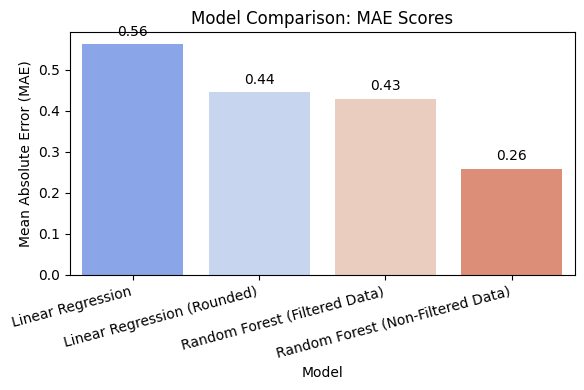

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming these variables are already defined and hold the R², MSE, and MAE values:
print(r2_lin_1, r2_lin_2, r2_rf_1, r2_rf_2)
print(mse_lin_1, mse_lin_2, mse_rf_1, mse_rf_2)
print(mae_lin_1, mae_lin_2, mae_rf_1, mae_rf_2)


# Prepare the data for R² plot
model_names = [
    'Linear Regression',
    'Linear Regression (Rounded)',
    'Random Forest (Filtered Data)',
    'Random Forest (Non-Filtered Data)'
]
r2_scores = [r2_lin_1, r2_lin_2, r2_rf_1, r2_rf_2]

# Create a bar plot for R² scores
plt.figure(figsize=(6, 4))
bar_plot_r2 = sns.barplot(x=model_names, y=r2_scores, palette='viridis')
plt.ylim(0, 1)  # Set y-axis limits to 0 to 1 for R² scores
plt.title('Model Comparison: R² Scores')
plt.ylabel('R² Score')
plt.xlabel('Model')

# Rotate the x-axis labels to prevent them from intersecting
plt.xticks(rotation=15, ha='right')  # Rotate labels by 15 degrees and align right

# Add value annotations on top of bars for R² scores
for index, value in enumerate(r2_scores):
    bar_plot_r2.text(index, value + 0.02, f"{value:.2f}", ha='center')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# Prepare the data for MSE plot
mse_scores = [mse_lin_1, mse_lin_2, mse_rf_1, mse_rf_2]

# Create a bar plot for MSE scores
plt.figure(figsize=(6, 4))
bar_plot_mse = sns.barplot(x=model_names, y=mse_scores, palette='magma')
plt.title('Model Comparison: MSE Scores')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Model')

# Rotate the x-axis labels to prevent them from intersecting
plt.xticks(rotation=15, ha='right')

# Add value annotations on top of bars for MSE scores
for index, value in enumerate(mse_scores):
    bar_plot_mse.text(index, value + 0.02, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()

mae_scores = [mae_lin_1, mae_lin_2, mae_rf_1, mae_rf_2]

# Create a bar plot for MAE scores
plt.figure(figsize=(6, 4))
bar_plot_mae = sns.barplot(x=model_names, y=mae_scores, palette='coolwarm')
plt.title('Model Comparison: MAE Scores')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')

# Rotate the x-axis labels to prevent them from intersecting
plt.xticks(rotation=15, ha='right')

# Add value annotations on top of bars for MAE scores
for index, value in enumerate(mae_scores):
    bar_plot_mae.text(index, value + 0.02, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()


**Do NOT run this section, I tried on previous data to study over-fitting, then made changes, and time did not help me to fix it again to the new data, it just shows my work**

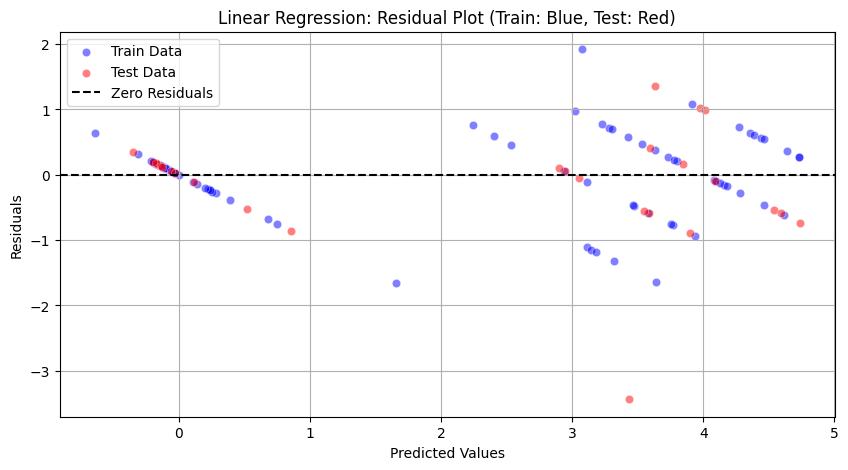

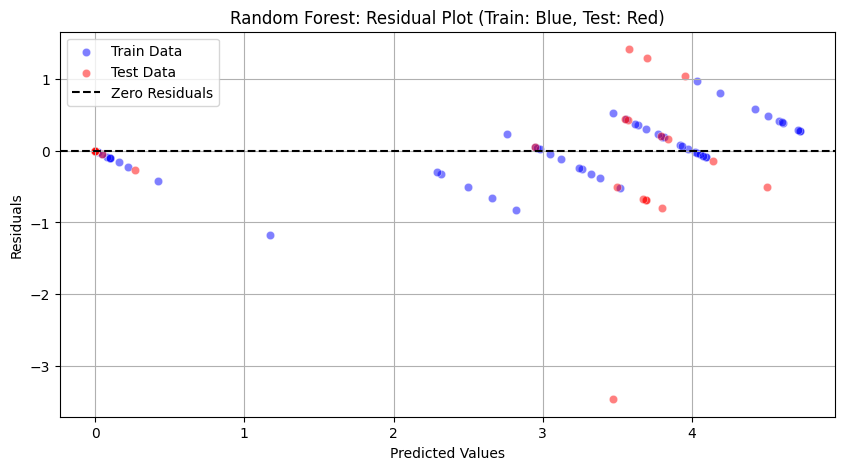

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals for Linear Regression (training data)
y_pred_train_lin = lin_reg.predict(X_train)
residuals_train_lin = y_train - y_pred_train_lin

# Residuals for Linear Regression (test data)
y_pred_test_lin = lin_reg.predict(X_test)
residuals_test_lin = y_test - y_pred_test_lin

# Create a residual plot for Linear Regression (train in blue, test in red)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_train_lin, y=residuals_train_lin, color='blue', alpha=0.5, label='Train Data')
sns.scatterplot(x=y_pred_test_lin, y=residuals_test_lin, color='red', alpha=0.5, label='Test Data')
plt.axhline(0, color='black', linestyle='--', label="Zero Residuals")
plt.title('Linear Regression: Residual Plot (Train: Blue, Test: Red)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Residuals for Random Forest (training data)
y_pred_train_rf = rf_reg.predict(X_train)
residuals_train_rf = y_train - y_pred_train_rf

# Residuals for Random Forest (test data)
y_pred_test_rf = rf_reg.predict(X_test)
residuals_test_rf = y_test - y_pred_test_rf

# Create a residual plot for Random Forest (train in blue, test in red)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_train_rf, y=residuals_train_rf, color='blue', alpha=0.5, label='Train Data')
sns.scatterplot(x=y_pred_test_rf, y=residuals_test_rf, color='red', alpha=0.5, label='Test Data')
plt.axhline(0, color='black', linestyle='--', label="Zero Residuals")
plt.title('Random Forest: Residual Plot (Train: Blue, Test: Red)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
